 ## "Diamond Price Insights"

import all library which going to use in this project

In [2]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("diamonds.csv")

In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Check the info of the data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


What is some values in the x,y,z are zero

In [7]:
df.loc[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Removes the rows and clean the data 

In [8]:
dropIndex = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)].index
df = df.drop(index=dropIndex)
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Now check the unique value of the cut,	color,	clarity,

In [9]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Now convert these values in the number for better visulization and the analysis of the project 

In [10]:
df['color'] = df['color'].factorize()[0]
df['cut'] = df['cut'].factorize()[0]
df['clarity'] = df['clarity'].factorize()[0]
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75


Now we are going to find the correlation among them 

<Axes: >

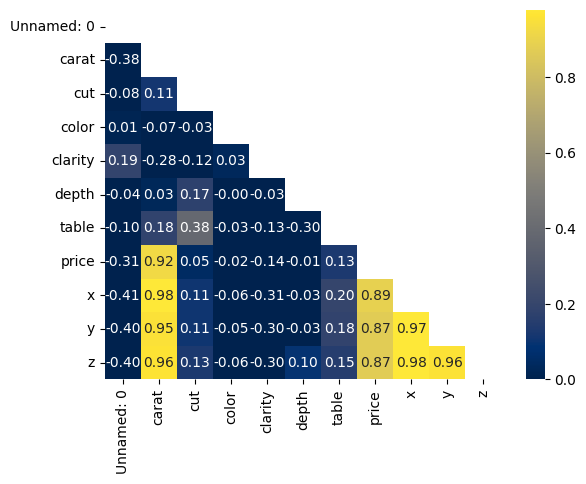

In [11]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, mask=mask, fmt='.2f', vmin=0, cmap='cividis')

We can see in the heatmap, there is the best correlation between x,y,z and price, carat. Anything else not so much.

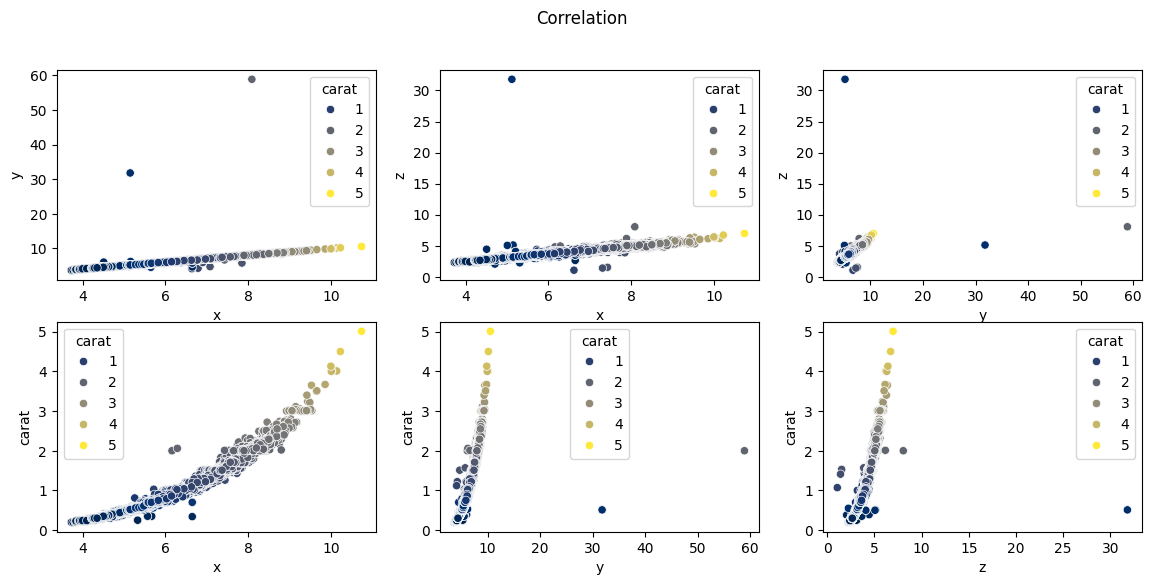

In [12]:


# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(14, 6))

# Set a common title for the figure
fig.suptitle('Correlation')

# Plotting the scatter plots
sns.scatterplot(data=df, x='x', y='y', ax=axs[0, 0], hue='carat', palette='cividis', legend=True).set(xlabel='x', ylabel='y')
sns.scatterplot(data=df, x='x', y='z', ax=axs[0, 1], hue='carat', palette='cividis', legend=True).set(xlabel='x', ylabel='z')
sns.scatterplot(data=df, x='y', y='z', ax=axs[0, 2], hue='carat', palette='cividis', legend=True).set(xlabel='y', ylabel='z')
sns.scatterplot(data=df, x='x', y='carat', ax=axs[1, 0], hue='carat', palette='cividis', legend=True).set(xlabel='x', ylabel='carat')
sns.scatterplot(data=df, x='y', y='carat', ax=axs[1, 1], hue='carat', palette='cividis', legend=True).set(xlabel='y', ylabel='carat')
sns.scatterplot(data=df, x='z', y='carat', ax=axs[1, 2], hue='carat', palette='cividis', legend=True).set(xlabel='z', ylabel='carat')

# Show the plots
plt.show()


There is exponential ratio between x,y,z and carat. Calculate the volume of the diamonds and we can use it instead of x,y,z and compare it with carat and price.



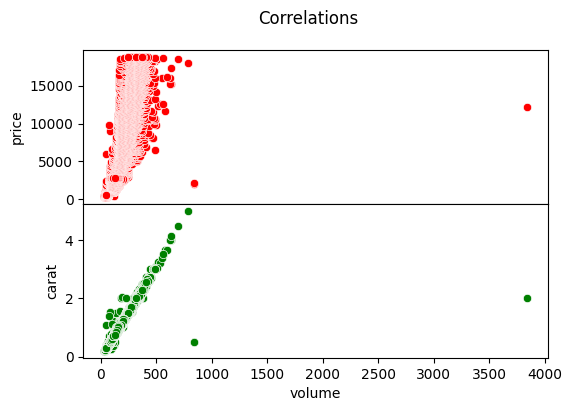

In [13]:
df['volume'] = df.x * df.y * df.z
fig, axs = plt.subplots(2, 1, figsize=(6,4), sharex=True)
plt.subplots_adjust(hspace = 0)
fig.suptitle('Correlations')
sns.scatterplot(data=df, x='volume', y='price', ax=axs[0], legend=True, color='red').set(xlabel='volume', ylabel='price')
sns.scatterplot(data=df, x='volume', y='carat', ax=axs[1], legend=True, color='green').set(xlabel='volume', ylabel='carat')
plt.show()

<Axes: >

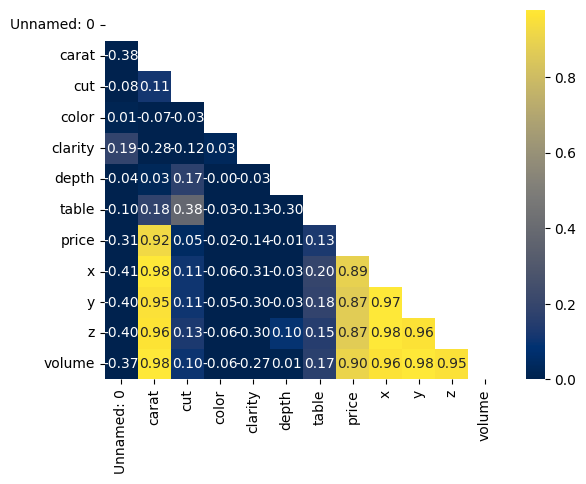

In [14]:
df['volume'] = df.x * df.y * df.z
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=0, mask=mask, cmap='cividis')

In [15]:
print(df.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z', 'volume'],
      dtype='object')


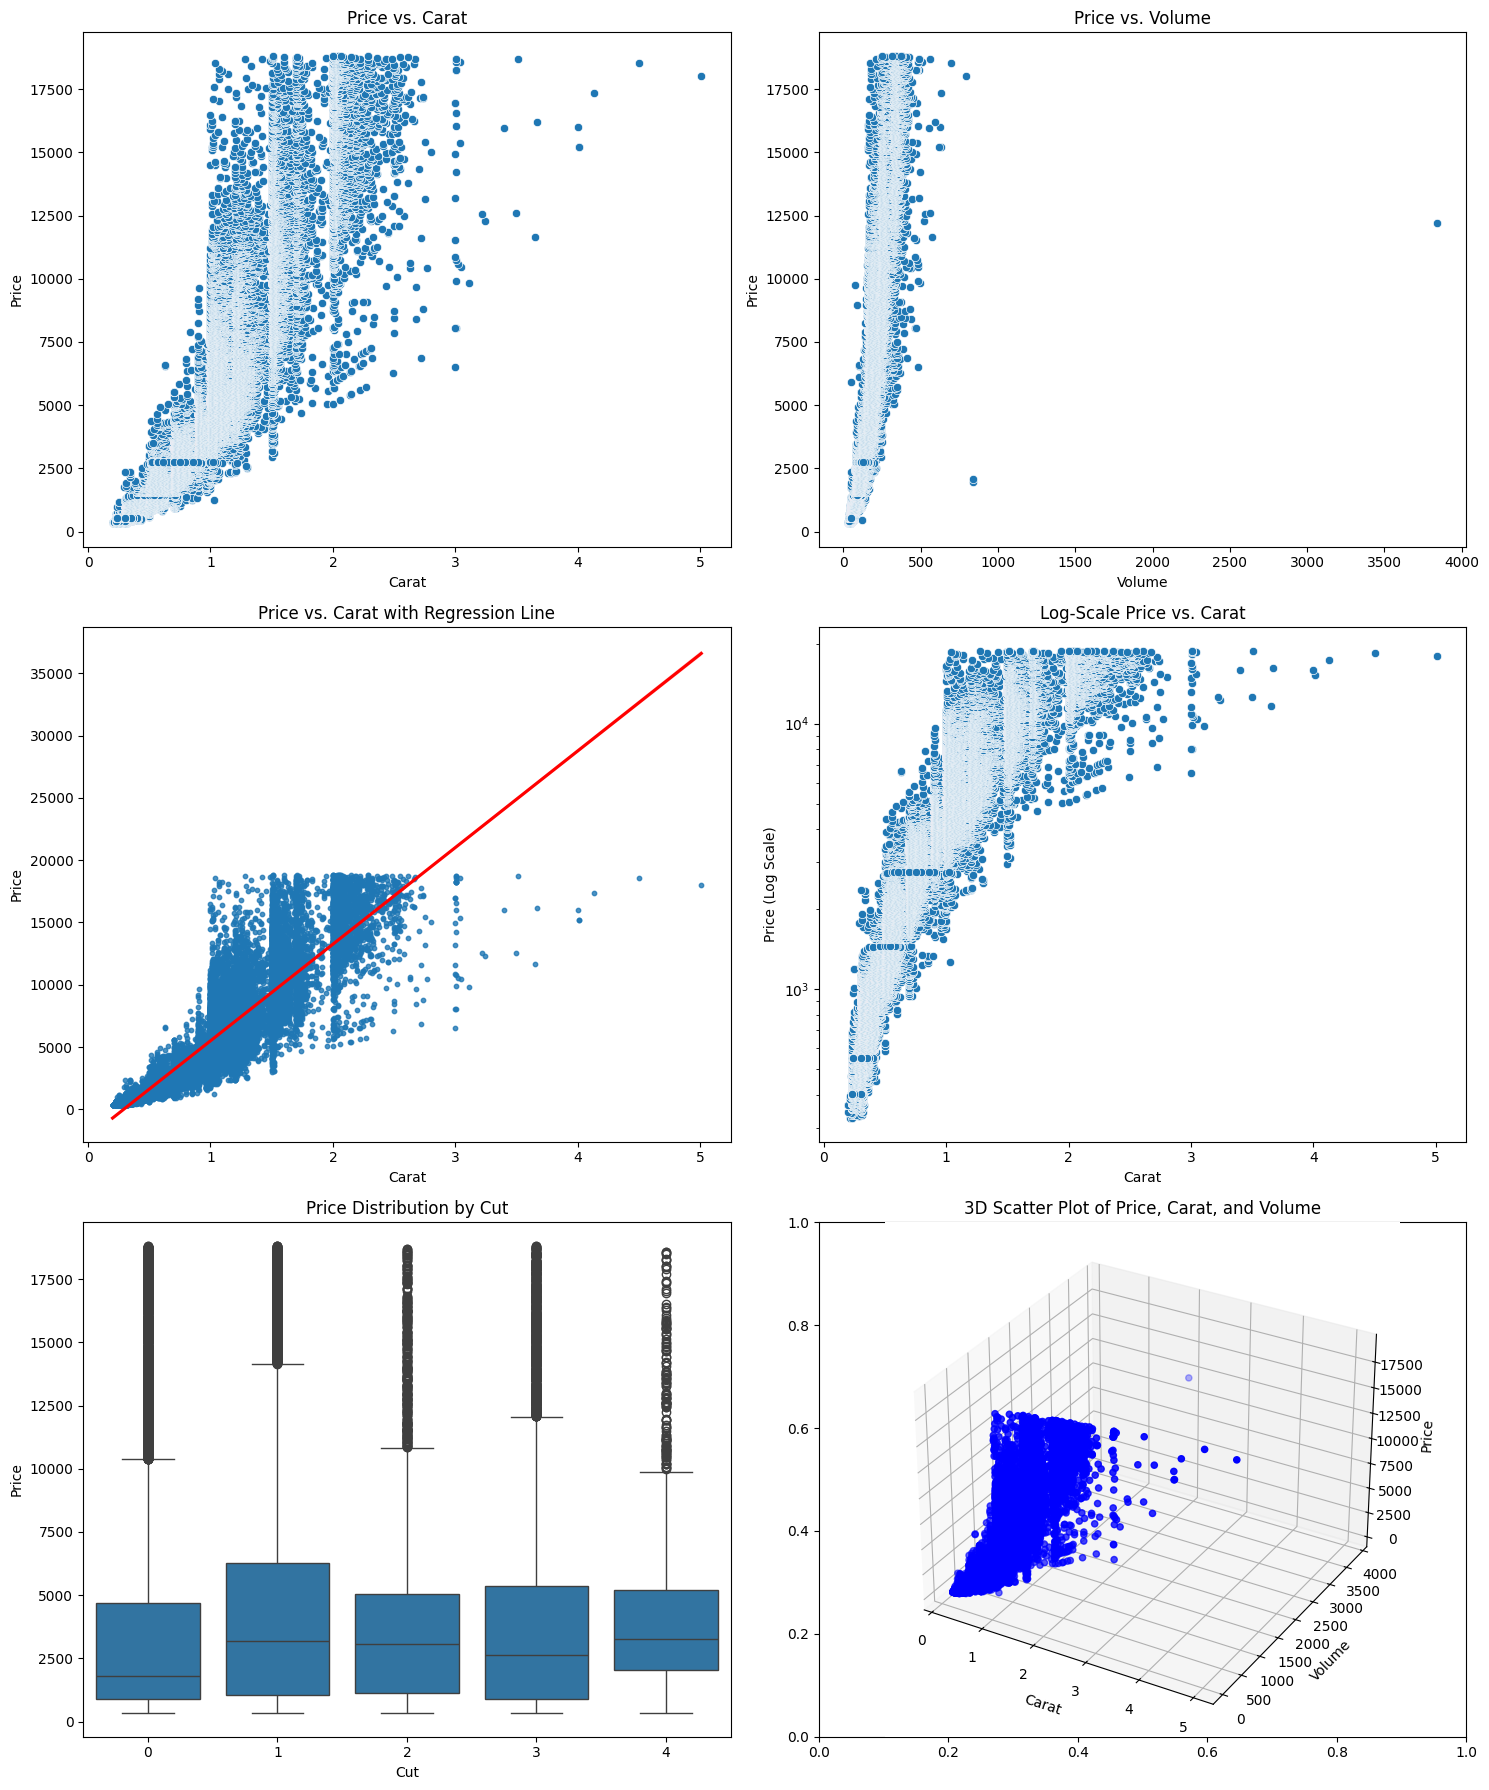

In [19]:

from mpl_toolkits.mplot3d import Axes3D

# Assuming df is your DataFrame
df['volume'] = df['x'] * df['y'] * df['z']  # If you haven't calculated volume yet

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

# 1. Price vs. Carat Scatter Plot
sns.scatterplot(data=df, x='carat', y='price', ax=axs[0, 0])
axs[0, 0].set_title('Price vs. Carat')
axs[0, 0].set_xlabel('Carat')
axs[0, 0].set_ylabel('Price')

# 2. Price vs. Volume Scatter Plot
sns.scatterplot(data=df, x='volume', y='price', ax=axs[0, 1])
axs[0, 1].set_title('Price vs. Volume')
axs[0, 1].set_xlabel('Volume')
axs[0, 1].set_ylabel('Price')

# 3. Price vs. Carat with Regression Line
sns.regplot(data=df, x='carat', y='price', ax=axs[1, 0], scatter_kws={'s':10}, line_kws={'color':'red'})
axs[1, 0].set_title('Price vs. Carat with Regression Line')
axs[1, 0].set_xlabel('Carat')
axs[1, 0].set_ylabel('Price')

# 4. Log-Scale Price vs. Carat Plot
sns.scatterplot(data=df, x='carat', y='price', ax=axs[1, 1])
axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Log-Scale Price vs. Carat')
axs[1, 1].set_xlabel('Carat')
axs[1, 1].set_ylabel('Price (Log Scale)')

# 5. Box Plot of Price by Cut
sns.boxplot(data=df, x='cut', y='price', ax=axs[2, 0])
axs[2, 0].set_title('Price Distribution by Cut')
axs[2, 0].set_xlabel('Cut')
axs[2, 0].set_ylabel('Price')

# 6. 3D Scatter Plot (Carat, Volume, Price)
ax = fig.add_subplot(3, 2, 6, projection='3d')
ax.scatter(df['carat'], df['volume'], df['price'], c='b', marker='o')
ax.set_title('3D Scatter Plot of Price, Carat, and Volume')
ax.set_xlabel('Carat')
ax.set_ylabel('Volume')
ax.set_zlabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


As we can see, we can use the volume instead x,y,z. Drop the x,y,z:



In [15]:
cols_to_drop = ['x', 'y', 'z']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
df.describe()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volume
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,1.228913,3.174091,2.256250,61.749514,57.456834,3930.993231,129.897567
std,15571.269010,0.473795,1.266077,2.050345,1.766337,1.432331,2.234064,3987.280446,78.219789
min,1.000000,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,31.707984
25%,13487.750000,0.400000,0.000000,1.000000,1.000000,61.000000,56.000000,949.000000,65.189759
50%,26973.500000,0.700000,1.000000,4.000000,2.000000,61.800000,57.000000,2401.000000,114.840180
75%,40457.250000,1.040000,3.000000,5.000000,3.000000,62.500000,59.000000,5323.250000,170.846415
max,53940.000000,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,3840.598060


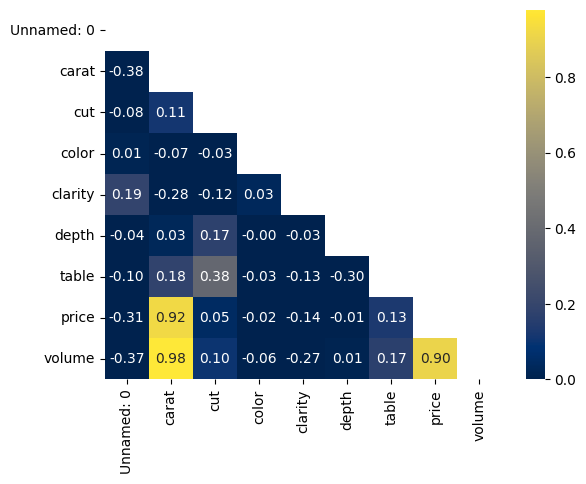

In [16]:
# Proceed with the heatmap
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=0, mask=mask,cmap='cividis')

plt.show()

Which diamond should we buy?


In [17]:
buy = df.copy()
buy['price_per_carat'] = buy['price'] / buy['carat']

buy = buy.sort_values(by='price_per_carat', ascending=True)

print(f"Best value for money: {round(min(buy['price_per_carat']), 2)}$")
print("The first 3:\n")
buy.head(3)




Best value for money: 1051.16$
The first 3:



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volume,price_per_carat
31962,31963,0.43,1,3,6,62.0,59.0,452,68.800452,1051.162791
15,16,0.32,1,0,6,60.9,58.0,345,51.883728,1078.125000
4,5,0.31,2,2,0,63.3,58.0,335,51.917250,1080.645161


end||

## future Scope 

Price Prediction

We have already imported, cleared and converted the datas. We can predict the prices. We can choose some models:
Linear Regression
Random Forest
Descision Tree
XGBoost